<a href="https://colab.research.google.com/github/NVREND/Cyberbullying-Classification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT
Kelompok 1:
1.   Destina Grace Fajarwati
2.   Dhannya Febryana
3.   Dikki Yusuf Kartajaya
4.   Dilla Meylia
5.   Dioko Benedictus Sinaga
6.   Dominikus Kern Bunardi
7.   Emerald Ade Panggayuh
8.   Endritha Pramudya



##1. Dataset

Dataset yang dibutuhkan diambil dari : https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

Keterangan dataset:

---


Ketika penggunaan media sosial semakin lazim di setiap kelompok umur, sebagian besar masyarakat mengandalkan media penting ini untuk komunikasi sehari-hari.  Keberadaan media sosial di mana-mana berarti bahwa cyberbullying dapat berdampak efektif terhadap siapa pun, kapan pun, dan di mana pun, dan anonimitas relatif
Internet membuat serangan pribadi seperti ini lebih sulit dihentikan dibandingkan penindasan tradisional.

Pada tanggal 15 April 2020, UNICEF mengeluarkan peringatan sebagai respons terhadap peningkatan risiko cyberbullying selama pandemi COVID-19 karena penutupan sekolah yang meluas, peningkatan waktu penggunaan perangkat, dan penurunan interaksi sosial tatap muka.  Statistik cyberbullying sangat mengkhawatirkan: 36,5% siswa sekolah menengah pertama dan atas pernah merasakan cyberbullying dan 87% pernah mengalami cyberbullying, dengan dampak mulai dari penurunan prestasi akademis, depresi, hingga pikiran untuk bunuh diri.

Mengingat semua hal ini, kumpulan data ini berisi lebih dari 47.000 tweet yang diberi label berdasarkan kelas cyberbullying:

Analisis sentimen cyberbullying. Dataset berisi kurang lebih 47.000 tweet bahasa inggris yang telah diberi label berdasarkan kelas cyberbullying yaitu
*   Age
*   Ethnicity
*   Gender
*   Religion
*   Other type of cyberbullying
*   Not cyberbullying

##2. Install & Import library

###Install Library Yang Tidak Ada Di Colab

In [ ]:
!pip install demoji
!pip install langdetect
!pip install contractions

###Import Library

In [ ]:
#Langkah selanjutnya adalah mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Text Cleaning & Data Preprocessing
import re
import string
import demoji
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

#Modelling
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

#Evaluation Metrics
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Periksa versi Python
import sys
print("Python version:", sys.version)

# Periksa versi library TensorFlow
print("TensorFlow version:", tf.__version__)

# Periksa versi library pandas
print("pandas version:", pd.__version__)

# Periksa versi library NumPy

print("NumPy version:", np.__version__)
print("Nltk version:", nltk.__version__)
print("demojji version:", demoji.__version__)

!pip show contractions
!pip show langdetect
# Periksa versi library lainnya sesuai kebutuhan


Python version: 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
TensorFlow version: 2.15.0
pandas version: 2.0.3
NumPy version: 1.25.2
Nltk version: 3.8.1
demojji version: 1.1.0
Name: contractions
Version: 0.1.73
Summary: Fixes contractions such as `you're` to you `are`
Home-page: https://github.com/kootenpv/contractions
Author: Pascal van Kooten
Author-email: kootenpv@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: textsearch
Required-by: 
Name: langdetect
Version: 1.0.9
Summary: Language detection library ported from Google's language-detection.
Home-page: https://github.com/Mimino666/langdetect
Author: Michal Mimino Danilak
Author-email: michal.danilak@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: six
Required-by: 


In [ ]:
!kaggle datasets download -d andrewmvd/cyberbullying-classification

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification
License(s): Attribution 4.0 International (CC BY 4.0)
cyberbullying-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/cyberbullying-classification.zip

Archive:  /content/cyberbullying-classification.zip
replace cyberbullying_tweets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cyberbullying_tweets.csv  


##3. Data Load

In [ ]:
df_ori = pd.read_csv ('/content/cyberbullying_tweets.csv')
df_ori

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
df = df_ori.copy()

df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


##4. Exploratory Data Analysis Basic

Pada tahap ini kita akan melakukan analisis sederhana seperti pengecekan missing values, statisitika deskriptif dan pengecekan distribusi data.

In [ ]:
#mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df.shape

(47692, 2)

In [ ]:
#menampilkan 5 baris pertama dataset
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


###Missing Values

In [ ]:
#Pengecekan data yang hilang
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

Tidak ada missing values sehingga tidak diperlukan adanya proses drop ataupun imputasi.

### Handling Duplicate Value

In [ ]:
# Mengecek baris yang terduplikat
print("\nMengecek baris yang terduplikat:")
print(df.duplicated().sum())


Mengecek baris yang terduplikat:
36


Terdapat 36 duplicate row dimana untuk kolom tweet_text dan cyberbullying_type ada 36 row yang memiliki kesamaan, ini akan dilakukan drop karena data duplicate tidak diperlukan

In [ ]:
# Hapus baris duplikat
df = df.drop_duplicates()

In [ ]:
# mengecek duplikasi terbaru
df.duplicated().sum()

0

In [ ]:
# mengecek informasi dataset terbaru
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47656 non-null  object
 1   cyberbullying_type  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


Dapat dilihat dataset terdiri dari 47656 tweet dengan label yang sesuai

###Check Balancing Data

In [ ]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64


Distribusi Kelas:
cyberbullying_type
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64


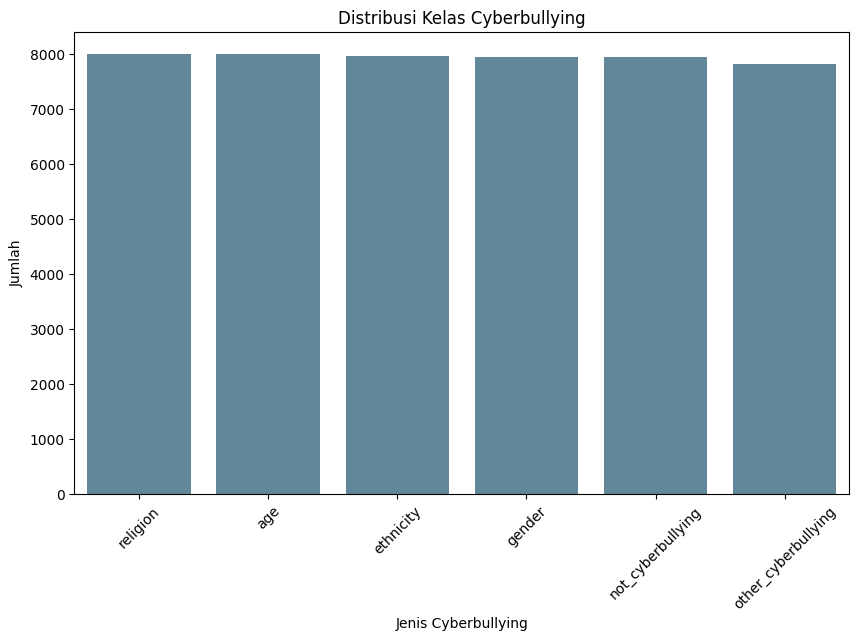

In [ ]:
# Distribusi Kelas
print("\nDistribusi Kelas:")
print(df['cyberbullying_type'].value_counts())

# Visualisasi distribusi kelas
plt.figure(figsize=(10,6))
sns.countplot(x='cyberbullying_type', data=df, order=df['cyberbullying_type'].value_counts().index,color='#598ba1')
plt.title('Distribusi Kelas Cyberbullying')
plt.xlabel('Jenis Cyberbullying')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

Didapati  bahwa setiap kelas memiliki data yang balance.
Jumlah data untuk setiap kelas bullying berkisar antara 7800-7900an. Sehingga, datanya balance. Meskipun sudah balance, namun kita perlu mengecek lagi distribusi kelas setelah dilakukan preprocessing. Jika datanya masih balance kita tidak perlu melakukan resampling.



### Word Cloud sebelum preprocessing

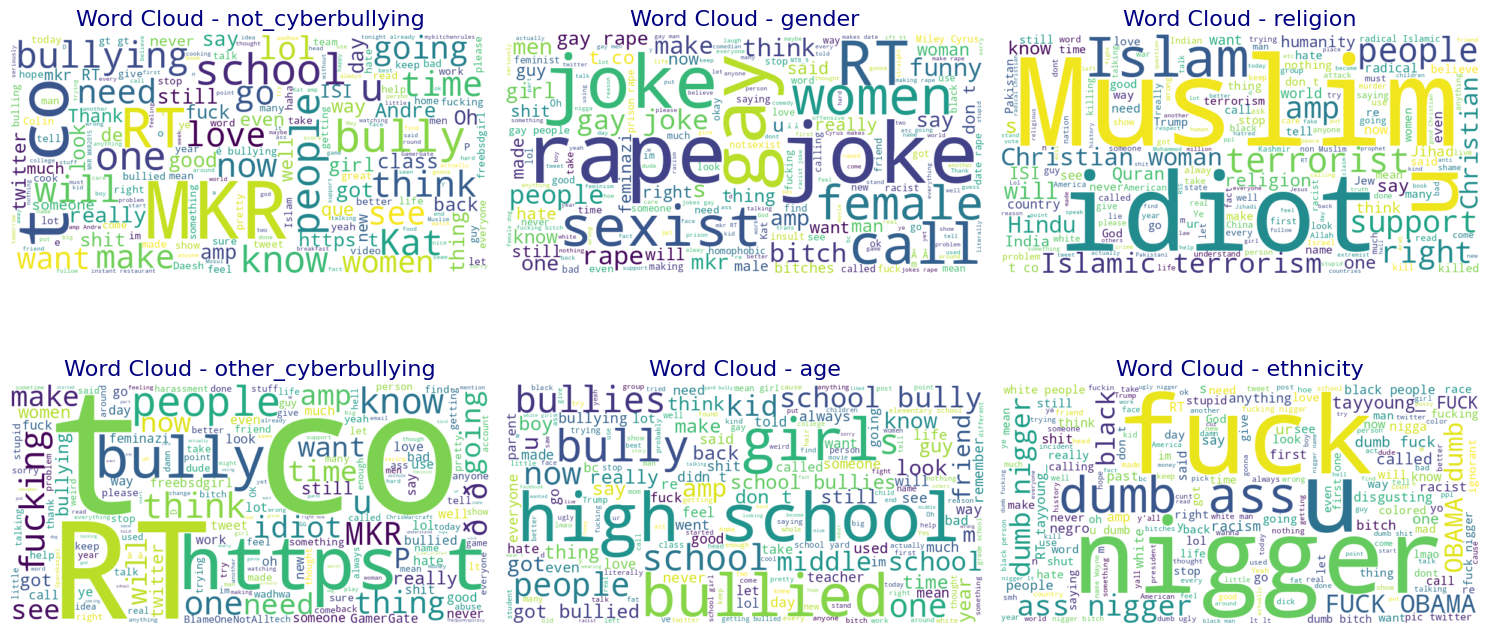

In [ ]:
# Mendefinisikan kategori unik
categories = df['cyberbullying_type'].unique()

# Mendefinisikan ukuran gambar
plt.figure(figsize=(15, 8))

# Melakukan iterasi untuk setiap kategori
for i, category in enumerate(categories):
    # Menggabungkan teks dari setiap kategori
    text = df[df['cyberbullying_type'] == category]['tweet_text'].str.cat(sep=' ')

    # Membuat word cloud untuk setiap kategori
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Menampilkan word cloud untuk setiap kategori
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {category}', fontsize=16, color='navy')
    plt.axis('off')

# Menampilkan gambar word cloud
plt.tight_layout()
plt.show()

### Visualisasi 10 kata yang paling sering muncul

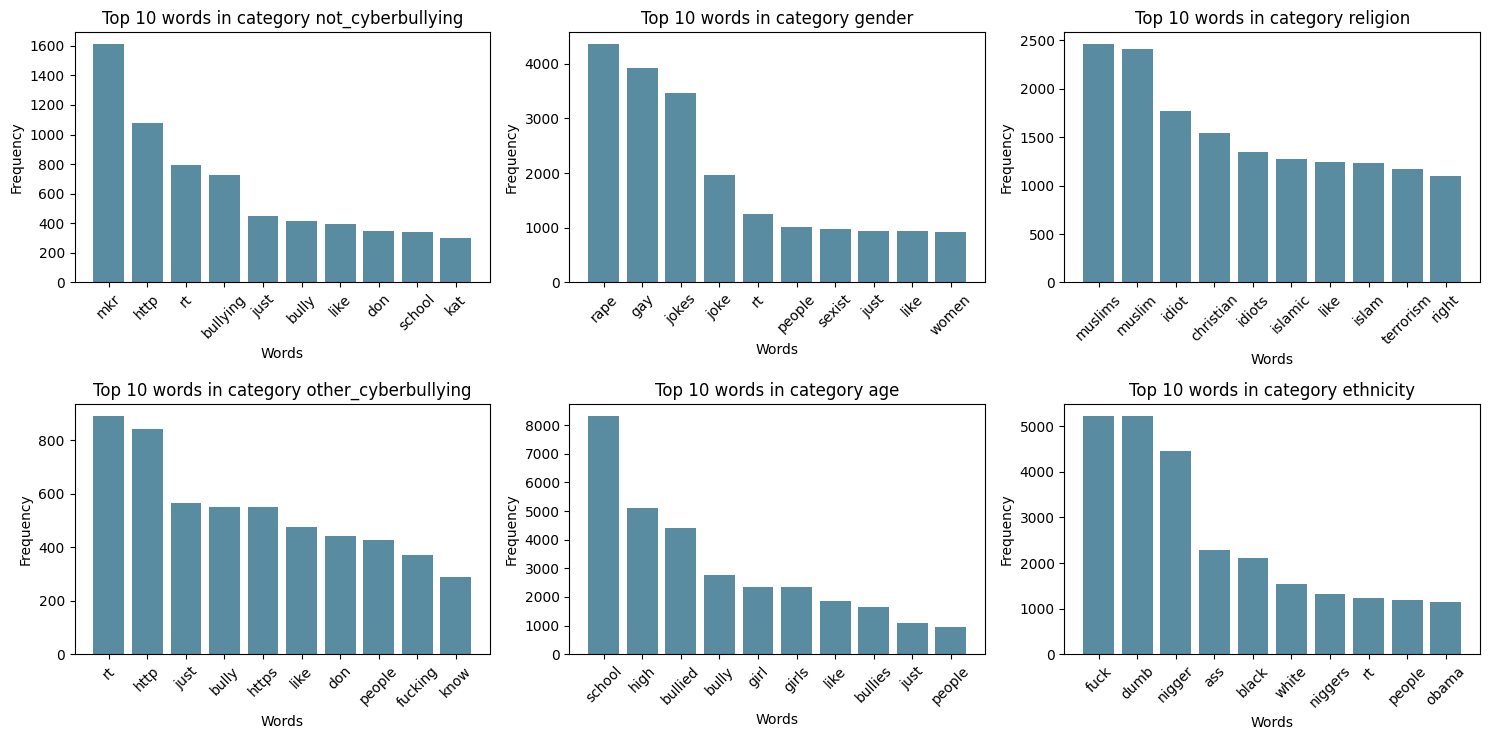

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Mendefinisikan kategori unik
categories = df['cyberbullying_type'].unique()

# Menyimpan kata-kata terbanyak dari setiap kategori
top_words_per_category = {}

# Melakukan iterasi untuk setiap kategori
for category in categories:
    # Menggabungkan teks dari setiap kategori
    text = df[df['cyberbullying_type'] == category]['tweet_text'].str.cat(sep=' ')

    # Menghitung frekuensi kemunculan kata-kata menggunakan CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])
    word_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    top_words_per_category[category] = top_words

# Menampilkan 10 kata terbanyak dari setiap kategori dan membuat visualisasinya
plt.figure(figsize=(15, 7.5))
for i, (category, top_words) in enumerate(top_words_per_category.items()):
    words, counts = zip(*top_words)
    plt.subplot(2, 3, i + 1)
    plt.bar(words, counts, color='#598ba1')
    plt.title(f'Top 10 words in category {category}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


###Dari wordcloud dan diagram batang di atas, diketahui bahwa 10 kata teratas yang muncul di 6 kategori yang ada:

1.   Not cyberbullying: mkr, http, rt, bullying, just, bully, like, don, school, kat
2.   Gender : rape, gay, jokes, rt, people, sexist, just, like, women
3.   Religion : muslims, muslim, idiot, christian, idiots, islamic, like, islam, terrorism, right
4.   Age : school, high, bullied, bully, girl, girls, like, bullies, just, people
5.   Ethinicity : fuck, dumb, nigger, ass, black, white, niggers, rt, people, obama
6.  Other cyberbullying: rt, http, just, bully, https, like, don, people, fucking, now



###Visualisasi Polarity dan Subjectivity tiap kategori di Cyberbullying Type

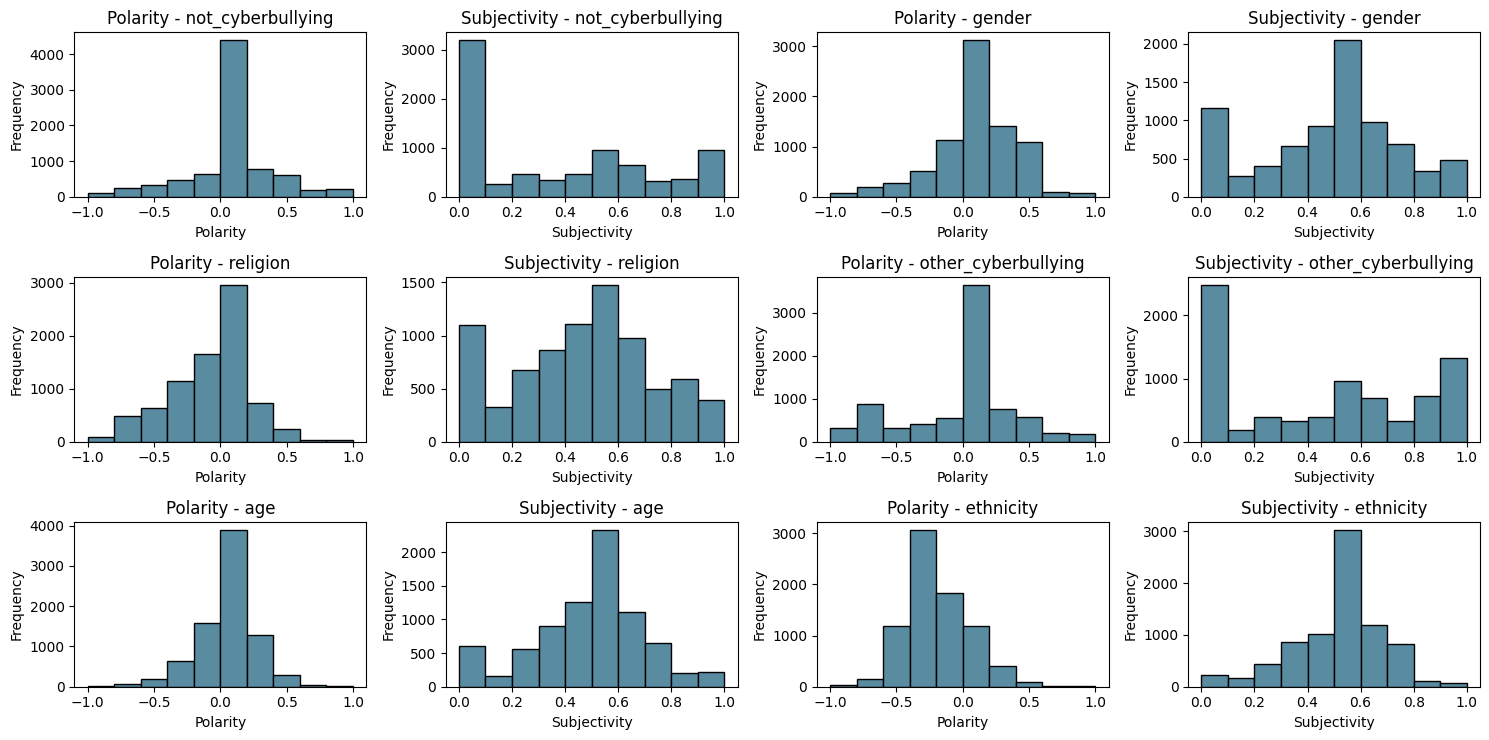

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Perform sentiment analysis on each text in DataFrame
sentiment_scores = {'category': [], 'polarity': [], 'subjectivity': []}
for category in df['cyberbullying_type'].unique():
    category_texts = df[df['cyberbullying_type'] == category]['tweet_text']
    for text in category_texts:
        analysis = TextBlob(text)
        sentiment_scores['category'].append(category)
        sentiment_scores['polarity'].append(analysis.sentiment.polarity)
        sentiment_scores['subjectivity'].append(analysis.sentiment.subjectivity)

# Create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores)

# Plot distribution of sentiment scores for each category
categories = sentiment_df['category'].unique()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.5))  # 50% of the previous size (30, 15)

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, category in enumerate(categories):
    category_data = sentiment_df[sentiment_df['category'] == category]

    # Plot polarity distribution
    category_data['polarity'].plot(kind='hist', ax=axes[i*2], title=f'Polarity - {category}', color='#598ba1', edgecolor='black')
    axes[i*2].set_xlabel('Polarity')

    # Plot subjectivity distribution
    category_data['subjectivity'].plot(kind='hist', ax=axes[i*2+1], title=f'Subjectivity - {category}', color='#598ba1', edgecolor='black')
    axes[i*2+1].set_xlabel('Subjectivity')

# Hide any unused subplots
for j in range(i*2+2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


 Polarity adalah ukuran yang mencerminkan sejauh mana suatu teks positif atau negatif. Skala polaritas berkisar dari -1 (sangat negatif) hingga 1 (sangat positif).
Interpretasi:
Nilai mendekati -1 menunjukkan teks yang sangat negatif.
Nilai mendekati 1 menunjukkan teks yang sangat positif.
Nilai mendekati 0 menunjukkan teks yang netral.

Subjectivity adalah ukuran yang mencerminkan sejauh mana suatu teks bersifat subjektif atau objektif. Skala subjektivitas berkisar dari 0 (sangat objektif) hingga 1 (sangat subjektif).
Interpretasi:
Nilai mendekati 0 menunjukkan teks yang sangat objektif, berisi fakta-fakta.
Nilai mendekati 1 menunjukkan teks yang sangat subjektif, berisi opini dan perasaan.


Dari visualisasi diatas, kita tahu nilai polaritas dan subjektivitas dari setiap kategori:

1.   Not cyberbullying:
*   Polaritas memiliki modus di rentang nilai 0 - 0,2 menunjukkan bahwa teks dengan kategori ini netral dan agak positif.
*   Subjektivitas memiliki modus di rentang 0.0 - 0.1 menunjukkan bahwa teks dengan kategori ini netral dan sedikit subjektif.

2.   Gender :
*   Polaritas memiliki modus di rentang nilai 0 - 0,2 menunjukkan bahwa teks dengan kategori ini netral dan agak positif.
*   Subjektivitas memiliki modus di rentang nilai 0.5 - 0.6, berarti sebagian besar teks dengan kategori gender tergolong subjektif, berisi opini dan perasaan.

3.   Religion :
*   Polaritas memiliki modus di rentang nilai 0 - 0,2 menunjukkan bahwa teks dengan kategori ini netral dan agak positif.
*   Subjektivitas memiliki modus di rentang nilai 0.5 - 0.6, berarti sebagian besar teks dengan kategori religion tergolong subjektif, berisi opini dan perasaan.


4.   Age :
*   Polaritas memiliki modus di rentang nilai 0 - 0,2 menunjukkan bahwa teks dengan kategori ini netral dan agak positif.
*   Subjektivitas memiliki modus di rentang nilai 0.5 - 0.6, berarti sebagian besar teks dengan kategori age tergolong subjektif, berisi opini dan perasaan.

5.   Ethinicity :
*   Polaritas memiliki modus di rentang nilai -0,2 sampai -0,4, berarti sebagian besar teks dengan kategori ethinicity tergolong negatif.
*   Subjektivitas memiliki modus di rentang nilai 0.5 - 0.6, berarti sebagian besar teks dengan kategori ethnicity tergolong subjektif, berisi opini dan perasaan.

6.  Other cyberbullying:
*   Polaritas memiliki modus di rentang nilai 0 - 0,2 menunjukkan bahwa teks dengan kategori ini netral dan agak positif.
*    Subjektivitas memiliki modus di rentang 0.0 - 0.1 menunjukkan bahwa teks dengan kategori ini netral dan sedikit subjektif.

### Visualisasi Panjang Tweet

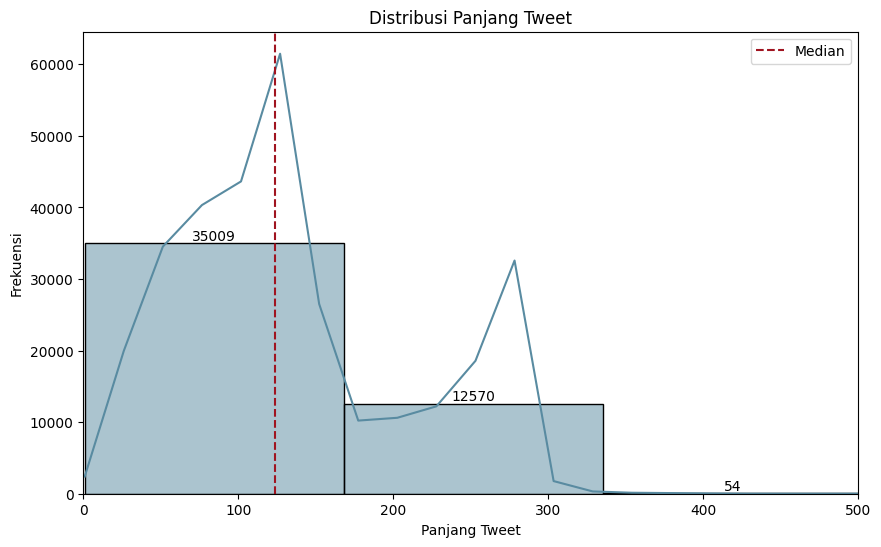

In [ ]:
df['tweet_length'] = df['tweet_text'].apply(len)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['tweet_length'], bins=30, kde=True, color='#598ba1')  # Mengubah warna plot
plt.title('Distribusi Panjang Tweet')
plt.xlabel('Panjang Tweet')
plt.ylabel('Frekuensi')

# Menambahkan batas untuk sumbu x
plt.xlim(0, 500)  # Batas disesuaikan dengan panjang tweet contoh

# Menambahkan label pada puncak bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')  # Mengubah warna teks menjadi hitam

# Menambahkan garis median
median_length = df['tweet_length'].median()
plt.axvline(median_length, color='#a01420', linestyle='--', label='Median')

plt.legend()  # Menambahkan legenda
plt.show()

Dari plot diatas, panjang tweet antara 0 - 175 karakter memiliki frekuensi kisaran 35.000 sementara 175-335 memiliki frekuensi sekitar 15.000. Sementara, median dari panjang tweet ada di kisaran 120 karakter.

##5. Preprocessing

###Hapus Emoji

In [ ]:
# Clean emojis from text
def remove_emojis(text):
    return demoji.replace(text, '')

### Hapus Tanda Baca, Stopwords, Tautan, Mention

In [ ]:
# Define stop words for text cleaning
stop_words = set(stopwords.words('english'))

def strip_all_entities(text):
    text = re.sub(r'\r|\n', ' ', text.lower())  #Ganti baris baru dengan spasi, dan ubah menjadi
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Hapus link dan mention
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Hapus non-ASCII char
    text = re.sub(r'\d+', '', text) # Hapus Angka
    text = re.sub(r'#\S+', '', text) #Hapus Hashtags
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

### Filter Special Char ($ dan &) Di Beberapa Kata dan Menghapus Spasi Berulang

In [ ]:
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Menghapus spasi yang berulang
def remove_multi_spaces(text):
    return re.sub(r"\s\s+", " ", text)

### Menghapus Tweet selain bahasa inggris

In [ ]:
"""def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else """

'def filter_non_english(text):\n    try:\n        lang = detect(text)\n    except LangDetectException:\n        lang = "unknown"\n    return text if lang == "en" else '

###Expand contractions
- seperti "can't" (cannot), "won't" (will not), "I'm" (I am), dll.

In [ ]:
def expand_contractions(text):
    return contractions.fix(text)

###Lemmatize Words
Keuntungan di bandingkan stemming

- Menghasilkan kata-kata yang valid.
- Lebih akurat karena mempertimbangkan konteks dan analisis morfologi.

In [ ]:
# Inisialisasi lemmatizer untuk text cleaning
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
# menghapus kata-kata pendek
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

"""# Mengubah kata ke bentuk dasarnya
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)
"""

# Menghapus spasi tambahan
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Menhapus spasi di awal dan diakhir tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Menghapus tweet pendek/singkat
"""
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else """

'\ndef remove_short_tweets(tweet, min_words=3):\n    words = tweet.split()\n    return tweet if len(words) >= min_words else '

###Menampilkan Hasil Preprocessing

In [ ]:
def clean_tweet(tweet):
    tweet = remove_emojis(tweet)
    tweet = expand_contractions(tweet)
    #tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_multi_spaces(tweet)
    tweet = lemmatize(tweet)
    #tweet = remove_short_words(tweet)
    #tweet = replace_elongated_words(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Menghapus spasi tambahan diantara kata
    return tweet

In [ ]:
%%time
# membersihkan teks pada kolom 'tweet_text' dalam dataframe dengan menggunakan fungsi clean_tweet.
df_ori['clean_tweet'] = [clean_tweet(tweet) for tweet in df_ori['tweet_text']]

CPU times: user 1min 3s, sys: 215 ms, total: 1min 3s
Wall time: 1min 3s


In [ ]:
df_ori.to_csv('cyberbullying_cleaned.csv', index=False)

In [ ]:
df_ori.head()

,tweet_text,cyberbullying_type,clean_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks head concerned another angry dude...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...


In [ ]:
df_ori["clean_tweet"].duplicated().sum()

3306

In [ ]:
#Menghapus tweets yang terduplikat
df_ori.drop_duplicates("clean_tweet", inplace=True)
df_ori["clean_tweet"].duplicated().sum()

0

In [ ]:
df_ori.cyberbullying_type.value_counts()

cyberbullying_type
religion               7934
age                    7862
ethnicity              7727
not_cyberbullying      7578
gender                 7556
other_cyberbullying    5729
Name: count, dtype: int64

In [ ]:
# Filter dataframe untuk menghapus baris dengan label 'other_cyberbullying'
df_ori = df_ori[df_ori['cyberbullying_type'] != 'other_cyberbullying']


Distribusi Kelas:
cyberbullying_type
religion             7934
age                  7862
ethnicity            7727
not_cyberbullying    7578
gender               7556
Name: count, dtype: int64


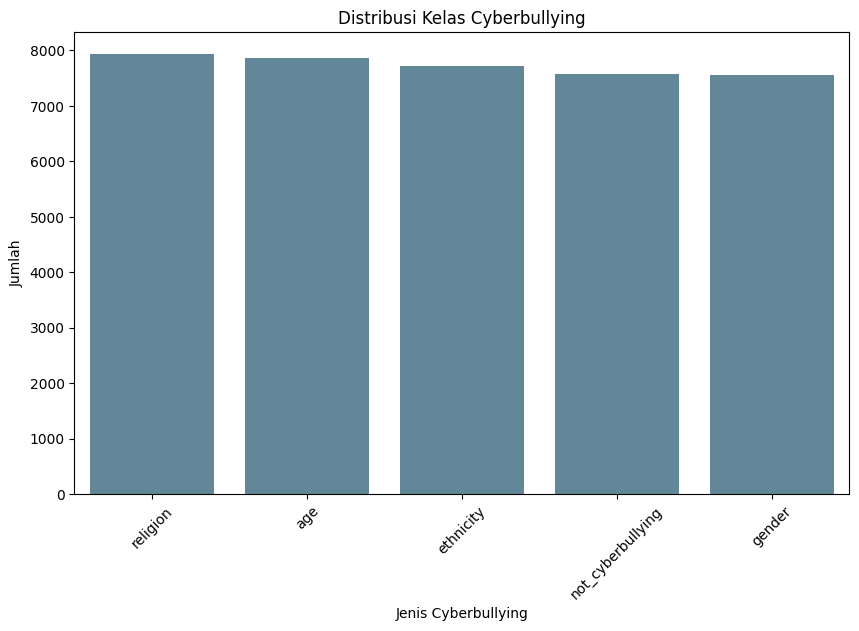

In [ ]:
# Distribusi Kelas
print("\nDistribusi Kelas:")
print(df_ori['cyberbullying_type'].value_counts())

# Visualisasi distribusi kelas
plt.figure(figsize=(10,6))
sns.countplot(x='cyberbullying_type', data=df_ori, order=df_ori['cyberbullying_type'].value_counts().index, color='#598ba1')
plt.title('Distribusi Kelas Cyberbullying')
plt.xlabel('Jenis Cyberbullying')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

<ipython-input-57-b2d418477d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ori['tweet_length'] = df_ori['clean_tweet'].apply(len)


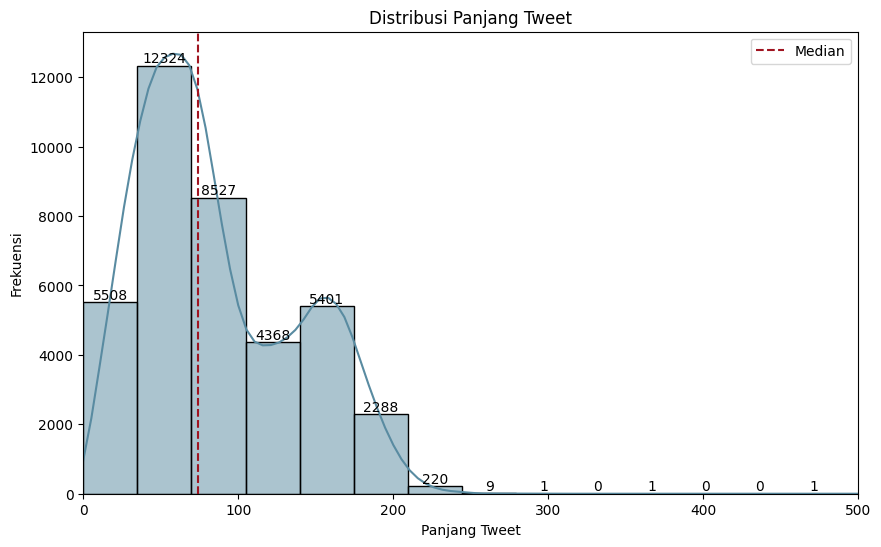

In [ ]:
df_ori['tweet_length'] = df_ori['clean_tweet'].apply(len)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df_ori['tweet_length'], bins=30, kde=True, color='#598ba1')  # Mengubah warna plot
plt.title('Distribusi Panjang Tweet')
plt.xlabel('Panjang Tweet')
plt.ylabel('Frekuensi')

# Menambahkan batas untuk sumbu x
plt.xlim(0, 500)  # Batas disesuaikan dengan panjang tweet contoh

# Menambahkan label pada puncak bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')  # Mengubah warna teks menjadi hitam

# Menambahkan garis median
median_length = df_ori['tweet_length'].median()
plt.axvline(median_length, color='#a01420', linestyle='--', label='Median')

plt.legend()  # Menambahkan legenda
plt.show()

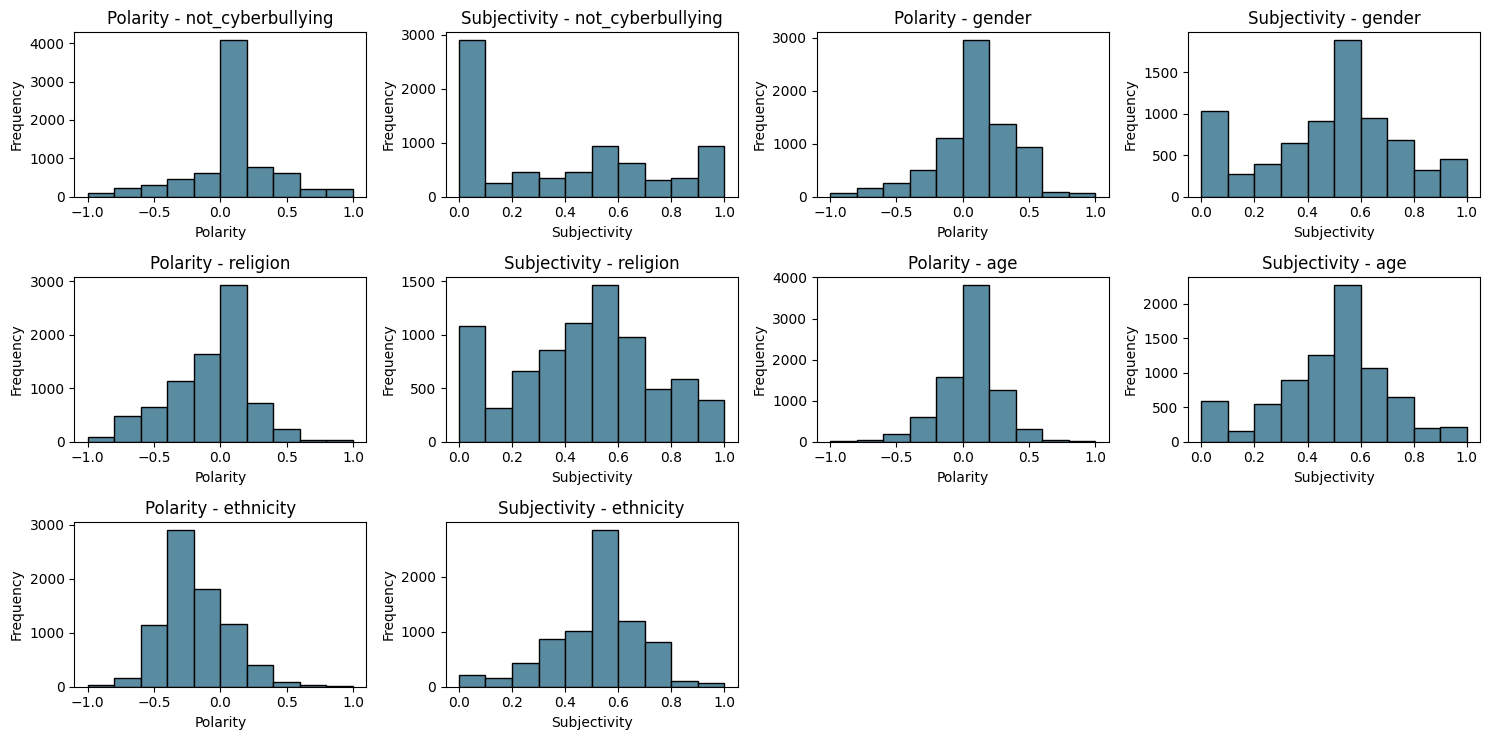

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Perform sentiment analysis on each text in DataFrame
sentiment_scores = {'category': [], 'polarity': [], 'subjectivity': []}
for category in df_ori['cyberbullying_type'].unique():
    category_texts = df_ori[df_ori['cyberbullying_type'] == category]['tweet_text']
    for text in category_texts:
        analysis = TextBlob(text)
        sentiment_scores['category'].append(category)
        sentiment_scores['polarity'].append(analysis.sentiment.polarity)
        sentiment_scores['subjectivity'].append(analysis.sentiment.subjectivity)

# Create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores)

# Plot distribution of sentiment scores for each category
categories = sentiment_df['category'].unique()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.5))  # 50% of the previous size (30, 15)

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, category in enumerate(categories):
    category_data = sentiment_df[sentiment_df['category'] == category]

    # Plot polarity distribution
    category_data['polarity'].plot(kind='hist', ax=axes[i*2], title=f'Polarity - {category}', color='#598ba1', edgecolor='black')
    axes[i*2].set_xlabel('Polarity')

    # Plot subjectivity distribution
    category_data['subjectivity'].plot(kind='hist', ax=axes[i*2+1], title=f'Subjectivity - {category}', color='#598ba1', edgecolor='black')
    axes[i*2+1].set_xlabel('Subjectivity')

# Hide any unused subplots
for j in range(i*2+2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


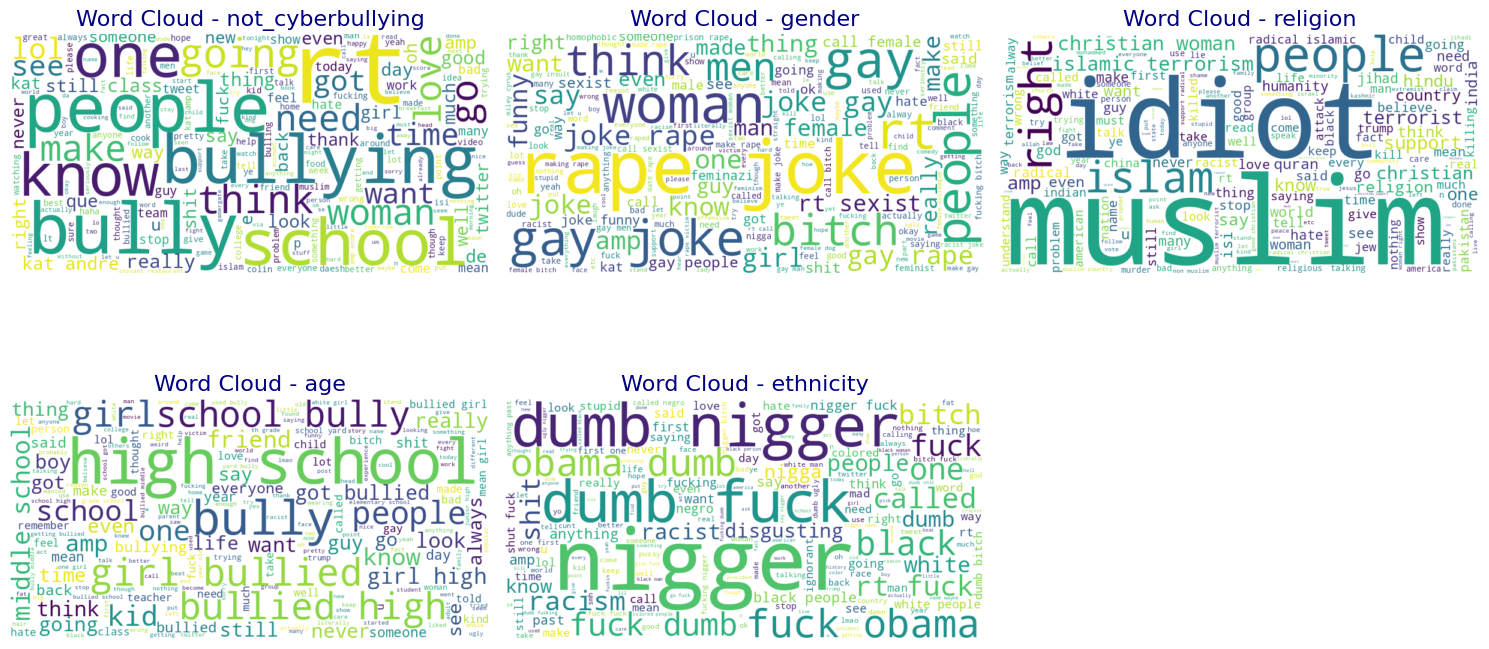

In [ ]:
categories = df_ori['cyberbullying_type'].unique()

# Mendefinisikan ukuran gambar
plt.figure(figsize=(15, 8))

# Melakukan iterasi untuk setiap kategori
for i, category in enumerate(categories):
    # Menggabungkan teks dari setiap kategori
    text = df_ori[df_ori['cyberbullying_type'] == category]['clean_tweet'].str.cat(sep=' ')

    # Membuat word cloud untuk setiap kategori
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Menampilkan word cloud untuk setiap kategori
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {category}', fontsize=16, color='navy')
    plt.axis('off')

# Menampilkan gambar word cloud
plt.tight_layout()
plt.show()

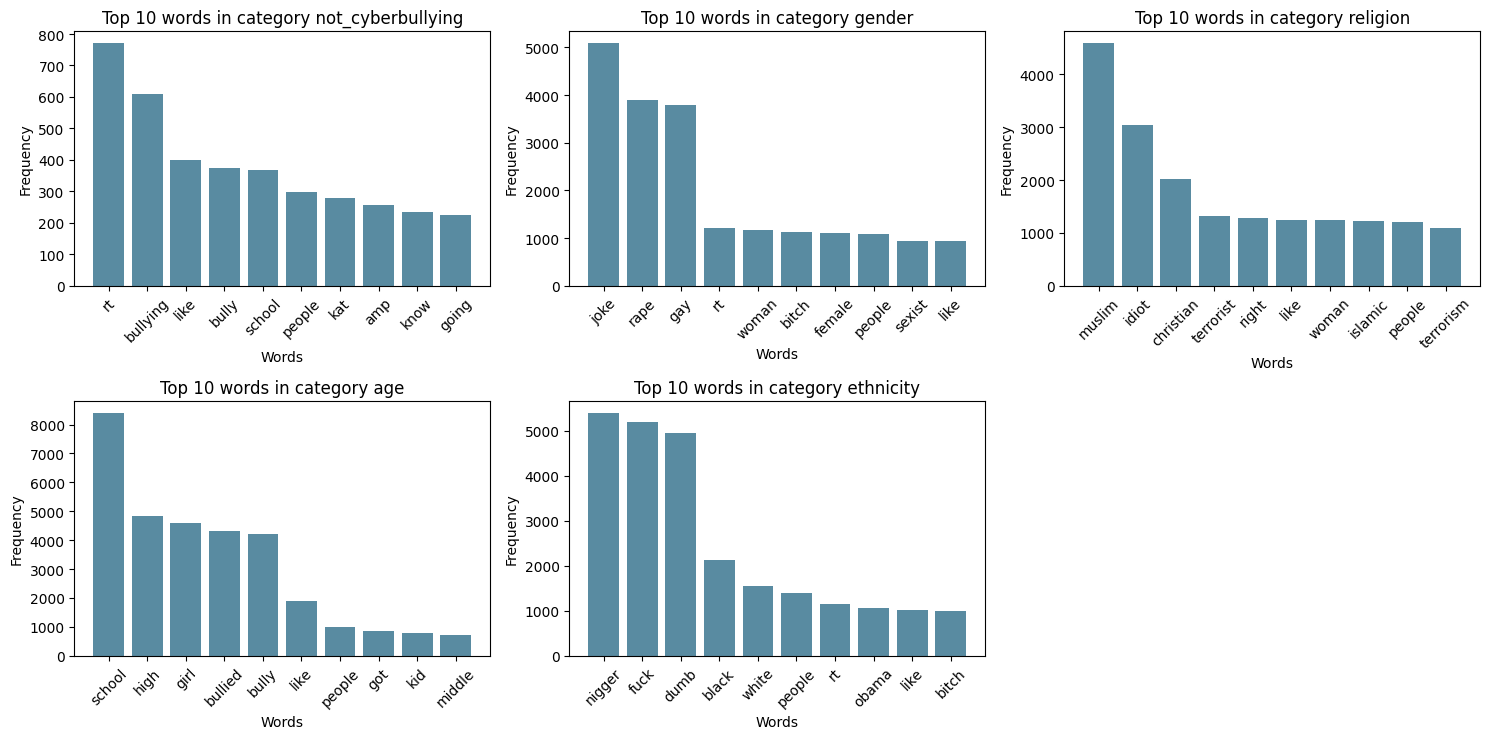

In [ ]:
# Mendefinisikan kategori unik
categories = df_ori['cyberbullying_type'].unique()

# Menyimpan kata-kata terbanyak dari setiap kategori
top_words_per_category = {}

# Melakukan iterasi untuk setiap kategori
for category in categories:
    # Menggabungkan teks dari setiap kategori
    text = df_ori[df_ori['cyberbullying_type'] == category]['clean_tweet'].str.cat(sep=' ')

    # Menghitung frekuensi kemunculan kata-kata menggunakan CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])
    word_counts = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))
    top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    top_words_per_category[category] = top_words

# Menampilkan 10 kata terbanyak dari setiap kategori dan membuat visualisasinya
plt.figure(figsize=(15, 7.5))
for i, (category, top_words) in enumerate(top_words_per_category.items()):
    words, counts = zip(*top_words)
    plt.subplot(2, 3, i + 1)
    plt.bar(words, counts, color='#598ba1')
    plt.title(f'Top 10 words in category {category}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Text Vectorization

In [ ]:
text_vectorization = TextVectorization(
    max_tokens=10000,  # Maximum vocabulary size
    output_mode='int',  # Output integers
    output_sequence_length=100,  # Pad or truncate sequences to a fixed length
    standardize='lower_and_strip_punctuation',  # Convert text to lowercase and remove punctuation
    split='whitespace'  # Split text by whitespace
)

# Adapt the TextVectorization layer to the entire dataset
text_vectorization.adapt(df_ori['clean_tweet'])

vocab_size = len(text_vectorization.get_vocabulary())

# Transform the entire dataset
X_vec = text_vectorization(df_ori['clean_tweet'])

# Convert tensor to numpy array for compatibility with sklearn
X_vec = np.array(X_vec)


In [ ]:
## Contoh dokumen
print('Contoh dokumen')
print(df_ori.clean_tweet[5])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([df_ori.clean_tweet[0]]))
print('Vector size : ', text_vectorization([df_ori.clean_tweet[0]]).shape)

Contoh dokumen
yes test god good bad indifferent weird whatever prof god existence

Hasil Text Vectorization
tf.Tensor(
[[ 87 576   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]], shape=(1, 100), dtype=int64)
Vector size :  (1, 100)


In [ ]:
#Menyimpan data vocab untuk deployment
# Save the vocabulary to a file
vocab = text_vectorization.get_vocabulary()
with open('vocab.txt', 'w') as f:
    for word in vocab:
        f.write(f"{word}\n")
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'school',
 'fuck',
 'like',
 'girl',
 'nigger',
 'joke',
 'dumb',
 'people',
 'high',
 'muslim',
 'bully',
 'bullied',
 'gay',
 'rape',
 'one',
 'rt',
 'idiot',
 'woman']

Dapat dilihat banyak tweets dengan classification "other_cyberbullying" terhapus. Dikarenakan kelas tersebut sangat tidak seimbang dibandingkan dengan kelas lain dan terlihat terlalu "generik"

Kami memutuskan untuk menghapus kelas 'other_cyberbullying'

###Encoding
Encoding merujuk pada cara bagaimana teks direpresentasikan dalam format digital yang dapat dipahami dan diproses oleh komputer. Proses ini sangat penting untuk memastikan bahwa teks dapat ditampilkan, disimpan, dan ditransfer tanpa kehilangan integritas atau informasi, terutama ketika teks tersebut mencakup berbagai karakter dari beragam bahasa.

In [ ]:
#label_encoding,  Change target into number

df_ori['cyberbullying_type'] = df_ori['cyberbullying_type'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

<ipython-input-44-c10bf2ab1855>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ori['cyberbullying_type'] = df_ori['cyberbullying_type'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})


In [ ]:
df_ori.cyberbullying_type.value_counts()

cyberbullying_type
0    7934
1    7862
2    7727
4    7578
3    7556
Name: count, dtype: int64

### Split data

In [ ]:

# Split dataset into train-validation-test (85% train-val, 15% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_vec,
    df_ori['cyberbullying_type'],
    test_size=0.15,
    random_state=42,
    stratify=df_ori['cyberbullying_type']
)

# Split train-validation (85% train, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.10,
    random_state=42,
    stratify=y_train_val
)

print('Training Size : ', X_train.shape)
print('Validation Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Training Size :  (29572, 100)
Validation Size   :  (3286, 100)
Test Size  :  (5799, 100)


In [ ]:
print(y_train)

16480    0
46492    2
22107    0
45258    2
45437    2
        ..
33603    1
37025    1
8266     3
8955     3
132      4
Name: cyberbullying_type, Length: 29572, dtype: int64


##6. Model Building

### Oversampling

Oversampling menggunakan SMOTE ini bertujuan untuk menyeimbangkan kelas pada data latih. Karena sebelumnya diketahui bahwa data kelas 'not_cyberbullying' tidak seimbang dibandingkan kelas yan lain.

In [ ]:
"""from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
"""
# One-hot encode the labels
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

"""
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

"""
print(y_val_ohe.shape)
print(y_test_ohe.shape)


(3286, 5)
(5799, 5)


### Model Bidirectional LSTM

In [ ]:
# Set seed untuk reproducibility
tf.random.set_seed(123)

# hyperparameter
regularizer = tf.keras.regularizers.l2(0.001) # untuk mengendalikan overfitting
learning_rate = 0.0001
vocab_size = vocab_size
num_classes = 5
output_dim = 100

# Definisi Model dengan LSTM
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,
                              output_dim=output_dim,
                              input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,
                                                       return_sequences=False,
                                                       kernel_regularizer=regularizer)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=learning_rate),
              metrics=['accuracy'],
              run_eagerly=True)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                34048     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                      

#### Training Model

In [ ]:
num_epochs = 20
batch_size = 32

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5) #pelatihan akan dihentikan jika tidak ada peningkatan dalam  'val_loss' selama 5 epoch berturut-turut (patience=5).

history = model.fit(
    X_train,
    y_train_ohe,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val_ohe),
    callbacks = [early_stopping])

Epoch 1/20
925/925 [==============================] - 101s 108ms/step - loss: 1.5174 - accuracy: 0.4070 - val_loss: 0.9506 - val_accuracy: 0.6601
Epoch 2/20
925/925 [==============================] - 70s 75ms/step - loss: 0.9016 - accuracy: 0.6685 - val_loss: 0.5522 - val_accuracy: 0.8491
Epoch 3/20
925/925 [==============================] - 73s 79ms/step - loss: 0.6135 - accuracy: 0.8059 - val_loss: 0.3764 - val_accuracy: 0.9038
Epoch 4/20
925/925 [==============================] - 69s 75ms/step - loss: 0.4760 - accuracy: 0.8612 - val_loss: 0.3163 - val_accuracy: 0.9181
Epoch 5/20
925/925 [==============================] - 71s 77ms/step - loss: 0.3996 - accuracy: 0.8871 - val_loss: 0.2910 - val_accuracy: 0.9175
Epoch 6/20
925/925 [==============================] - 69s 75ms/step - loss: 0.3536 - accuracy: 0.9031 - val_loss: 0.2783 - val_accuracy: 0.9191
Epoch 7/20
925/925 [==============================] - 69s 74ms/step - loss: 0.3230 - accuracy: 0.9118 - val_loss: 0.2791 - val_accurac

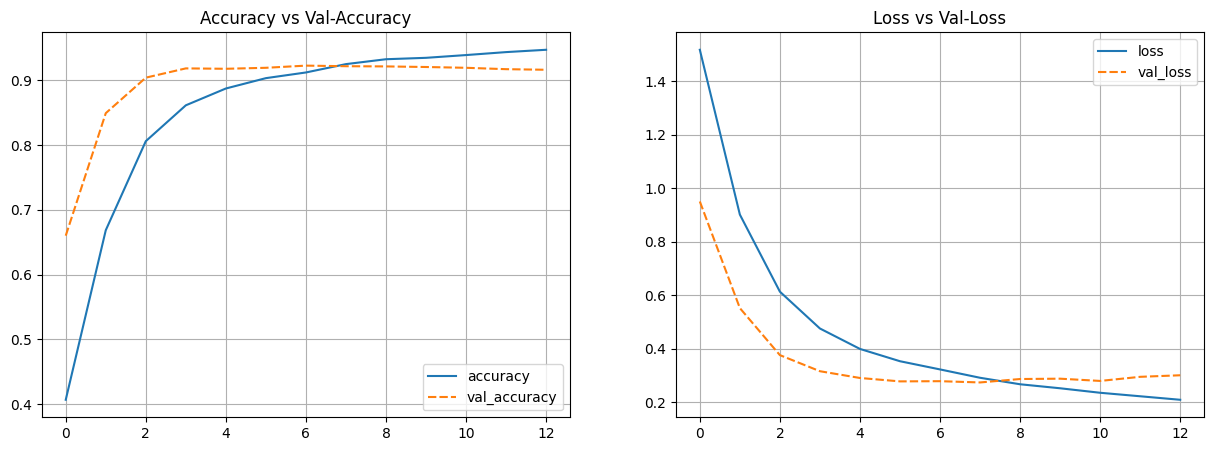

In [ ]:
# Plot Training Results

history_lstm_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_lstm_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.subplot(1, 2, 2)
sns.lineplot(data=history_lstm_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

#### Model Evaluation

In [ ]:
# Prediksi kelas
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_ohe, axis=1)

# Definisikan nama kelas sesuai dengan label target
target_names = ['religion', 'age', 'ethnicity', 'gender', 'not_cyberbullying']

report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)

print(report)

182/182 [==============================] - 6s 34ms/step
                   precision    recall  f1-score   support

         religion       0.93      0.94      0.93      1190
              age       0.96      0.97      0.97      1179
        ethnicity       0.98      0.97      0.98      1159
           gender       0.91      0.86      0.88      1134
not_cyberbullying       0.81      0.85      0.83      1137

         accuracy                           0.92      5799
        macro avg       0.92      0.92      0.92      5799
     weighted avg       0.92      0.92      0.92      5799



In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Tampilkan classification report
print("Classification Report:")
print(report)

# Tampilkan confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
                   precision    recall  f1-score   support

         religion       0.93      0.94      0.93      1190
              age       0.96      0.97      0.97      1179
        ethnicity       0.98      0.97      0.98      1159
           gender       0.91      0.86      0.88      1134
not_cyberbullying       0.81      0.85      0.83      1137

         accuracy                           0.92      5799
        macro avg       0.92      0.92      0.92      5799
     weighted avg       0.92      0.92      0.92      5799


Confusion Matrix:
[[1118    7    9   15   41]
 [   2 1144    3    1   29]
 [  12    2 1130    2   13]
 [  19    2    2  971  140]
 [  51   32    6   83  965]]


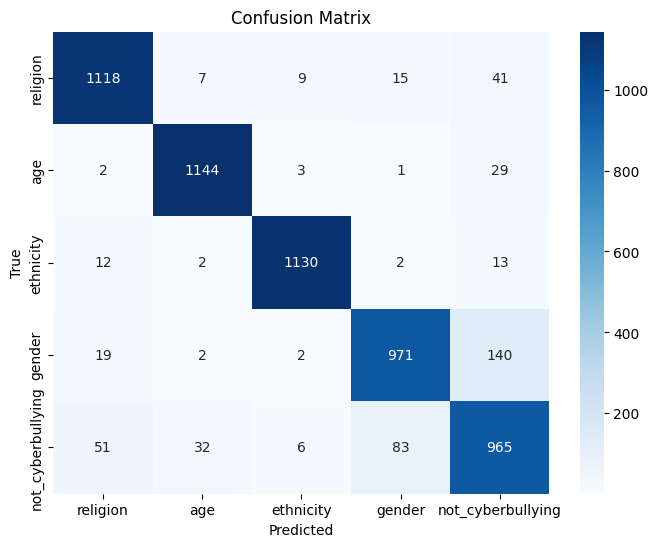

Classification Report:
                   precision    recall  f1-score   support

         religion       0.93      0.94      0.93      1190
              age       0.96      0.97      0.97      1179
        ethnicity       0.98      0.97      0.98      1159
           gender       0.91      0.86      0.88      1134
not_cyberbullying       0.81      0.85      0.83      1137

         accuracy                           0.92      5799
        macro avg       0.92      0.92      0.92      5799
     weighted avg       0.92      0.92      0.92      5799



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Tentukan nama kelas sesuai dengan label target
target_names = ['religion', 'age', 'ethnicity', 'gender', 'not_cyberbullying']

# Visualisasi confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
print("Classification Report:")
print(report)


In [ ]:
# save model H5
model.save('model_fix.h5')

In [ ]:
# Memuat model dari file .h5
loaded_model = load_model('cyberbullying_model.h5')

## Conclusion

Hasil dari

## Deployment

In [ ]:
!pip install -U -q ibm-watson-machine-learning

In [ ]:
api_key='YKp3IkfC6DHsXDzu_IFV4L8Z79c_lGAxqFjbVrLA0XGL'
location = 'us-south'

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

In [ ]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

client.spaces.list(limit=5)

In [ ]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (
        next(item for item in space["resources"] if item["entity"]["name"] == space_name)["metadata"]["id"]
    )

space_uid = guid_from_space_name(client, "Kelompok 1")
print("Space UID - " + space_uid)

In [ ]:
#space_id = space_uid #id dari space yg telah dibaut
space_id = '4d4595f4-5368-4540-ac9a-fc2642f20d28'
client.set.default_space(space_id)

In [ ]:
# Publish model in Watson Machine Learning repository on Cloud
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-23.1-py3.10")
print(sofware_spec_uid)

In [ ]:
#compres model yang sudah kesimpan
!tar -zcvf cyberbullying_model.h5.tgz cyberbullying_model.h5

In [ ]:
#Define model name, autor name and email.
metadata = {
    client.repository.ModelMetaNames.NAME: "BilLSTMModel",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.12",  # Tipe model TensorFlow yang digunakan
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

# Simpan model ke Watson Machine Learning
published_model = client.repository.store_model(
    model='cyberbullying_model.h5.tgz', #gunakan loaded_model untuk published_model
    meta_props=metadata,
    training_data=X_train_resampled, #gunakan train_dataset dari tf.data.Dataset
    training_target=y_train_ohe_resampled
)

In [ ]:
published_model_id = client.repository.get_model_id(published_model)
published_model_id

In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deploy BilLSTM model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_id,
                                               meta_props=metadata)

In [ ]:
deployment_id = client.deployments.get_id(created_deployment)
deployment_id

## TESTING

In [ ]:
new_text = "When I saw his birth certificate it had white set as the race so he always thought that way and when he went into the military and they read out loud his full name and race he looked around like they just called me negro! The governor crossed out white and put negro on top."
new_text = clean_tweet(new_text)
new_text

In [ ]:
# Define the TextVectorization layer
vectorization = TextVectorization(
    max_tokens=10000,  # Maximum vocabulary size
    output_mode='int',  # Output integers
    output_sequence_length=100,  # Pad or truncate sequences to a fixed length
    standardize='lower_and_strip_punctuation',  # Convert text to lowercase and remove punctuation
    split='whitespace'  # Split text by whitespace
)

# Adapt the TextVectorization layer to the training data
vectorization.adapt(X_train)

new_text_vec = vectorization([new_text])

In [ ]:
# Konversi EagerTensor menjadi array numpy
new_text_vec_np = np.array(new_text_vec)

# Kirim vektor sebagai data input ke deployment model untuk prediksi
response = client.deployments.score(deployment_id, meta_props={"input_data": [{"values": new_text_vec_np.tolist()}]})

# Interpretasikan hasil prediksi
prediction = response["predictions"][0]["values"][0][0]
print('proba',prediction)

In [ ]:
label_mapping = {0: 'religion', 1: 'age', 2: 'ethnicity', 3: 'gender', 4: 'not_cyberbullying'}

# Find the index of the maximum value in the list
max_index = prediction.index(max(prediction))

# Map the index to the corresponding label using the label mapping
max_label = label_mapping[max_index]

print("The largest value is:", max(prediction))
print("Cyberbullying Type:", max_label)

In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
from ibm_watson_machine_learning import APIClient
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

api_key = 'YKp3IkfC6DHsXDzu_IFV4L8Z79c_lGAxqFjbVrLA0XGL'
location = 'us-south'

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

space_id = '4d4595f4-5368-4540-ac9a-fc2642f20d28'
client = APIClient(wml_credentials)
client.set.default_space(space_id)

# Load your TextVectorization layer
vectorization = TextVectorization(
    max_tokens=10000,  # Maximum vocabulary size
    output_mode='int',  # Output integers
    output_sequence_length=100,  # Pad or truncate sequences to a fixed length
    standardize='lower_and_strip_punctuation',  # Convert text to lowercase and remove punctuation
    split='whitespace'  # Split text by whitespace
)


# Adaptasi lapisan TextVectorization ke data latihan
vectorization.adapt(X_train)

# Label mapping
label_mapping = {0: 'religion', 1: 'age', 2: 'ethnicity', 3: 'gender', 4: 'not_cyberbullying'}

# Function to preprocess text input
def preprocess_text(text):
    text_vector = vectorization([text])
    return text_vector.numpy()

# Function to make prediction request
def get_prediction(text):
    # Preprocess the text input
    text_vector = preprocess_text(text)
    text_vector = text_vector.reshape((1, 100))
    # Prepare payload with input data
    payload_scoring = {
        "input_data": [{
            "fields": ["text"],
            "values": [text_vector.tolist()]
        }]
    }

    # Make prediction request
    response = client.deployments.score(deployment_id, payload_scoring)

    # Process prediction response
    try:
        prediction_probabilities = response['predictions'][0]['values'][0]
        max_index = np.argmax(prediction_probabilities)
        predicted_label = label_mapping[max_index]
        return predicted_label
    except KeyError:
        return "Error making prediction"

# Streamlit UI
def main():
    st.title('Cyberbullying Type Classifier')
    st.write('This app predicts the type of cyberbullying based on input text.')

    # Input text box
    user_input = st.text_area('Enter text to classify', 'Type your text here...')

    # Predict button
    if st.button('Predict'):
        predicted_label = get_prediction(user_input)
        st.write(f'Predicted Cyberbullying Type: {predicted_label}')

if __name__ == '__main__':
    main()


In [ ]:
!streamlit run --server.port 8501 <nama_file>.py &>/dev/null&
!pip install pyngrok
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url
